In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from graphviz import Source

In [2]:
df = pd.read_csv('data/ram_price.csv')

In [3]:
df.shape

(333, 3)

In [4]:
df.head(5)

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'price'], dtype='object')

In [6]:
#데이터가 인덱스까지 저장된 경우이기에 인덱스 삭제
#df = df.drop(df.columns[0], axis= 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  333 non-null    int64  
 1   date        333 non-null    float64
 2   price       333 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


In [8]:
df.head(5)

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


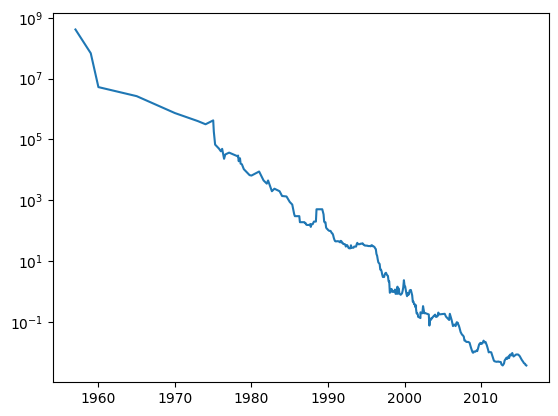

In [9]:
plt.semilogy(df['date'], df['price'])
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
train_set = df[df['date'] < 2000]
test_set = df[df['date'] >= 2000]

x_train, y_train = train_set['date'].values, train_set['price'].values
x_test, y_test = test_set['date'].values, test_set['price'].values

print(x_train.shape, y_train.shape) # x_train이 1차원 array임 사이킷런에서 x데이터는 2차원을 요구함
# reshape test
#x_train.reshape((-1,1)).shape
#x_train.reshape((1,-1)).shape
#x_train.reshape((-1,2)).shape
x_train = x_train.reshape((-1, 1))
x_test = x_test.reshape((-1, 1))

(202,) (202,)


In [17]:
#문제확인 테스트 스코어가 엉망임
model = DecisionTreeRegressor(max_depth= 15, random_state= 42 )
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9999999999999929, -9.328486410017087)

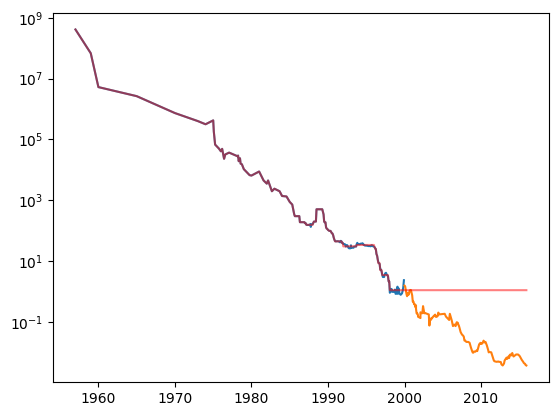

In [18]:
x = df[['date']].values
y = df[['price']].values
y_predicted = model.predict(x)

plt.semilogy(train_set['date'], train_set['price'])
plt.semilogy(test_set['date'], test_set['price'])
plt.semilogy(x, y_predicted, c = 'r', alpha=0.5)
plt.show()